# Importing/Storing data

In [1]:
# pip install wfdb
# pip install 

In [2]:
import wfdb
import os
import glob
import pandas as pd
import numpy as np
#%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
#print('Current directory is: {}'.format(os.getcwd()))

In [4]:
records = []
properties = []
annot = []
AnnSymb = []
AnnSamp = []
AnnRhythm = []
Rpeak_Samp = []
Rpeak_Symb = []


for f in glob.glob('C:/Users/masud/Desktop/Github_Bachelor_Project/wfdb-python/data/*.dat'): ##### change the path (afib) to your own directory. The rest should 
                                                                                             ##### remin the same
    sig, fields = wfdb.rdsamp(f[:-4], channels=[1])  #### In this function, you have the opportunity to pass 
                                       #### "channels=[0]" or "channels=[1]" to select channel 1 or 2.
    ann = wfdb.rdann(f[:-4], 'atr')
    QRS = wfdb.rdann(f[:-4], 'qrs')
    Symb = pd.Series(ann.symbol)
    Samp = pd.Series(ann.sample)
    QRS_Symb = pd.Series(QRS.symbol)
    QRS_Samp = pd.Series(QRS.sample)
    Rhythm = pd.Series(ann.aux_note)
    records.append(sig)
    properties.append(fields)
    annot.append(ann)
    AnnSymb.append(Symb)
    AnnSamp.append(Samp)
    Rpeak_Symb.append(QRS_Symb)
    Rpeak_Samp.append(QRS_Samp)
    AnnRhythm.append(Rhythm)
    
    

AnnSymb = pd.Series(AnnSymb).values
AnnSamp = pd.Series(AnnSamp).values

In [5]:
#This is only for last record, calculated in above loop
print(AnnRhythm[0])
print("------------------------------------")
print(AnnSamp[0])
print("------------------------------------")
print("All samples of R-peaks below")
print(Rpeak_Samp[0])
print("------------------------------------")
#print(records[0])
#print(type(records[0]))
#print(np.where(Rpeak_Samp[22] <= ))
#df.iloc[22] # acessing ROW 22
#print("------------------------------------")

0        (N
1     (AFIB
2        (N
3     (AFIB
4        (N
5     (AFIB
6        (N
7     (AFIB
8        (N
9     (AFIB
10       (N
11    (AFIB
12       (N
13    (AFIB
14       (N
dtype: object
------------------------------------
0          30
1      102584
2      119604
3      121773
4      122194
5      133348
6      166857
7     1096245
8     1098054
9     1135296
10    1139595
11    1422436
12    1423548
13    1459277
14    1460416
dtype: int32
------------------------------------
All samples of R-peaks below
0             61
1            200
2            358
3            584
4            729
          ...   
44000    8999121
44001    8999327
44002    8999531
44003    8999734
44004    8999941
Length: 44005, dtype: int32
------------------------------------


# Pre processing data...

In [6]:
labeled_Rpeaks = []
appended_data = []
for i in range(23): ## 23 records
    for j in range(len(AnnSamp[i])-1): ## AnnSamp or AnnRhythm -- both same dimensions
        df = pd.DataFrame(Rpeak_Samp[i][(Rpeak_Samp[i] > AnnSamp[i][j]) & (Rpeak_Samp[i] < AnnSamp[i][j+1])])
        df['Label'] = AnnRhythm[i][j]
        appended_data.append(df)
        

labeled_Rpeaks = pd.concat(appended_data)
labeled_Rpeaks

,0,Label
0,61,(N
1,200,(N
2,358,(N
3,584,(N
4,729,(N
...,...,...
15373,2849597,(N
15374,2849785,(N
15375,2849975,(N
15376,2850083,(N


### Filter, only get Hearbeats with annotations '(N' OR '(AFIB'

In [7]:
labeled_Rpeaks_N_AFIB = labeled_Rpeaks.loc[(labeled_Rpeaks.Label == '(N') | (labeled_Rpeaks.Label == '(AFIB'), :]
labeled_Rpeaks_N_AFIB[0:1000]

,0,Label
0,61,(N
1,200,(N
2,358,(N
3,584,(N
4,729,(N
...,...,...
995,149897,(AFIB
996,149989,(AFIB
997,150086,(AFIB
998,150169,(AFIB


### Convert 'Label' column to boolean expr

In [8]:
### s.where(s > 1, 10)
#labeled_Rpeaks_N_AFIB['Label'] = labeled_Rpeaks_N_AFIB['Label'].astype('bool')
labeled_Rpeaks_N_AFIB['Label'] = labeled_Rpeaks_N_AFIB['Label'].map( 
                   {'(N':False ,'(AFIB':True}) 

<ipython-input-8-36743a647d57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_Rpeaks_N_AFIB['Label'] = labeled_Rpeaks_N_AFIB['Label'].map(


In [9]:
labeled_Rpeaks_N_AFIB['Label'] = labeled_Rpeaks_N_AFIB['Label'].astype(int)

labeled_Rpeaks_N_AFIB.rename(columns={0: 'Rpeaks'},
          inplace=True, errors='raise')

<ipython-input-9-9cd7ad84a37a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_Rpeaks_N_AFIB['Label'] = labeled_Rpeaks_N_AFIB['Label'].astype(int)
D:\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
Rpeaks_N_AFIB = labeled_Rpeaks_N_AFIB["Rpeaks"]
Label_N_AFIB = labeled_Rpeaks_N_AFIB["Label"]
Label_N_AFIB = np.array(Label_N_AFIB, dtype=np.float64)

labeled_Rpeaks_N_AFIB[0:1000]

,Rpeaks,Label
0,61,0
1,200,0
2,358,0
3,584,0
4,729,0
...,...,...
995,149897,1
996,149989,1
997,150086,1
998,150169,1


### Window slider

In [11]:
#print(records[0])
#print(np.shape(records[0]))
#print()
#print()
#records_trans = np.transpose(records[0])
#print(np.shape(records_trans))
#records[0].flatten()
#np.squeeze(records[0], axis=1)
#np.shape(records[0])

In [12]:
###Run with heartbeats ##convert to numpy array 
#from window_slider import Slider
#import numpy
#list = records_trans
#bucket_size = 6600
#overlap_count = 3300
#slider = Slider(bucket_size,overlap_count)
#slider.fit(list)       
#while True:
#    window_data = slider.slide()
#    # do your stuff
#    print(window_data)
#    if slider.reached_end_of_list(): break

### Visualising the ECG signals

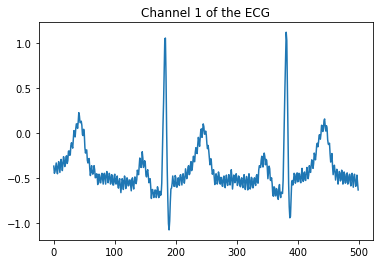

In [13]:
#plt.title("Both Channels (0 and 1)")
#plt.title("Channel 0 of the ECG") #Called ['ECG1']
plt.title('Channel 1 of the ECG') #Called ['ECG2']
plt.plot(sig[:500])

#################### Accessing annotations 
#display(fields) ### Last record annotation
#print(f"Units in which the ECG is measured {fields['units']}")
#display(properties[22])
#print(f"Units in which the ECG is measured {properties[22]['units']}")

# Segmenting & Calculating features METHOD: Rpeaks_N_AFIB

### X

In [14]:
rri2 = np.diff(Rpeaks_N_AFIB) ### Storing the intervals between rpeaks
print(rri2.dtype)
rri2 = np.array(rri2, dtype=np.float64) ### So no overflow issues happens when calc in for loop later
print(rri2.dtype)
print(len(rri2))
amount = -(len(rri2) % 20)
print(amount)
rec_amount = rri2[:amount]
print(len(rec_amount))
segmented_rec = rec_amount.reshape(35428,20)
segmented_rec[0]

int32
float64
708566
-6
708560


array([139., 158., 226., 145., 144., 239., 148., 149., 234., 212., 217.,
       202., 207., 206., 137., 135., 131.,  94., 125., 117.])

In [15]:
features2 = []

    ### Calculating features for every single segmented "block" inside the segmented_record variable
for x in range(len(segmented_rec)):
    #MEAN
    ff1 = np.mean(segmented_rec[x])
    #STD
    ff2 = np.std(segmented_rec[x])
    #RMSSD
    sum_ = 0
    for y in range(len(segmented_rec[x]) - 1): ### loops 19 times
        sum_ += (segmented_rec[x][y] - segmented_rec[x][y+1])**2
    sum_multiplied = 1/(len(segmented_rec) - 1) * sum_
    ff3 = np.sqrt(sum_multiplied)
    #NORMALIZED RMSSD
    ff4 = (ff3 / ff1)

    my_features2 = pd.Series([np.around(ff1,3), np.around(ff2,3), np.around(ff3,3), np.around(ff4,3)], 
                            index=['Mean','STD','RMSSD','Normalized RMSSD'])
    features2.append(my_features2)

In [16]:
n = 0

print(f"Features for that specific segment:\n{features2[n]}") 
print('\n'f"features2 variable contains {len(features2)} segments")

Features for that specific segment:
Mean                168.250
STD                  43.226
RMSSD                 1.115
Normalized RMSSD      0.007
dtype: float64

features2 variable contains 35428 segments


### Y

In [17]:
y_amount = Label_N_AFIB[:- 7] ### So it is divisible by 20
y_shape = y_amount.reshape(35428,20)
y_list = []

### Calc if every 20 segment block is Normal synus rythm or AFIB
for l in range(len(y_shape)):
    #y_segment = y_shape
    sum_segment = np.sum(y_shape[l])
    if sum_segment >= 10:
        sum_segment = 1
    else: sum_segment = 0
    y_list.append(sum_segment)

y_list = np.array(y_list, dtype=np.float64)
print(y_list.dtype)
print(f"Length of y_list: {len(y_list)}")


float64
Length of y_list: 35428


# Segmenting & Calculating features METHOD: RRI

In [18]:
#A sample of 250 elements, gives 1 clear signal (because 250hz frequency)
single_record_rri = []
rri = []

squared_summed_differencies = 0
i = 0
for i in range(len(Rpeak_Samp)): ### loops 23 times
    single_record_rri = np.diff(Rpeak_Samp[i])
    rri.append(single_record_rri)

In [19]:
single_record_mean = []
rri_mean = []
single_record_std = []
rri_std = []
single_record_RMSSD = []
RMSSD = []
single_record_nRMSSD = []
nRMSSD = []

all_segmented_records = []
all_features = []


### TO acess every single record
### record_to_segment = rri[index]
for index in range(len(rri)): ### Loops 23 times
    #(below line) gives a value between 0 and 19, which is the amount used to remove from the end of a record, by slicing.
    amount_to_segment = -(len(rri[index]) % 20)
    if amount_to_segment != 0:
        rri_segmented_record = rri[index][:amount_to_segment]
    else: 
        rri_segmented_record = rri[index] #if divisible by 20, no need to slice this record
    #(below line) gives us the number of "blocks" to put every single 20-segment into.
    length = len(rri_segmented_record) / 20
    rri_segmented_record = np.split(rri_segmented_record,length)
    all_segmented_records.append(rri_segmented_record)
    
    features = []
    
    ### Calculating features for every single segmented "block" inside the segmented_record variable
    for i in range(len(rri_segmented_record)):
        #MEAN
        f1 = np.mean(rri_segmented_record[i])
        #STD
        f2 = np.std(rri_segmented_record[i])
        #RMSSD
        sqaured_summed_differencies = 0
        for k in range(len(rri_segmented_record[i]) - 1): ### loops 19 times
            sqaured_summed_differencies += (rri_segmented_record[i][k] - rri_segmented_record[i][k+1])**2
        squared_summed_differencies_multiplied = 1/(len(rri_segmented_record) - 1) * sqaured_summed_differencies
        f3 = np.sqrt(squared_summed_differencies_multiplied)
        #NORMALIZED RMSSD
        f4 = (f3 / f1)
        
        my_features = pd.Series([np.around(f1,3), np.around(f2,3), np.around(f3,3), np.around(f4,3)], 
                                index=['Mean','STD','RMSSD','Normalized RMSSD'])
        features.append(my_features)
        
    all_features.append(features)

### Features for a single block (20 heart beats), inside a given record
### Accessing the 23 individual records (index 0 to 22), gives a single record, that is segmented into arrays of 20. Accessing each 20 array segment/block, by indexing, this time second dimension [ ]-->[ ]<--

In [20]:
n = 3
m = 156

print(f"Record nr {n}, and index {m} in that record contains this segment:") 
print(all_segmented_records[n][m])
print("Features for that specific segment:") 
print(all_features[n][m])

summed = 0
for z in range(len(all_features)):
    summed += len(all_features[z])
print('\n'f"all_features variable contains {summed} segments")

Record nr 3, and index 156 in that record contains this segment:
[165 175 173 170 162 163 165 169 167 169 164 165 162 168 170 169 169 165
 168 169]
Features for that specific segment:
Mean                167.350
STD                   3.380
RMSSD                 0.379
Normalized RMSSD      0.002
dtype: float64

all_features variable contains 56413 segments


# Classifications algorithms

### SVM

In [21]:
y = y_list
print(f"length of y: {len(y)}")
X = features2
print(f"length of X: {len(X)}")

length of y: 35428
length of X: 35428


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
print(len(X_train))
print(len(X_test))

28342
7086


In [24]:
from sklearn.svm import SVC
model = SVC()

In [25]:
model.fit(X_train, y_train)

SVC()

In [26]:
model.score(X_test, y_test)

0.6445103020039514

### Decision trees

In [34]:
### How do you select the optimal order?
#df5 = pd.DataFrame(features2)
#df5

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
clf.score(X_test, y_test)

0.8767993226079593

In [38]:
#tree.plot_tree(clf) 

# Cross-validation

In [29]:
#import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn import datasets
#from sklearn import svm

#X, y = datasets.load_iris(return_X_y=True) ### instead of using iris dataset
#X.shape, y.shape

In [30]:
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.4, random_state=0)

#X_train.shape, y_train.shape

#X_test.shape, y_test.shape


#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#clf.score(X_test, y_test)

In [40]:
#from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1, random_state=42)
#scores = cross_val_score(clf, X, y, cv=5)
#scores